# Forecasting furniture sale

In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
furniture = pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\Assignment and Projects\2-Projects\Dataset\Super_Store.csv",encoding='cp1252')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# Data Preparation

In [4]:
furniture.shape

(2121, 21)

In [5]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [6]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [7]:
#checking the stock time stamp
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [8]:
#We reomove the columns that we do not need as well as check missing values
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture = furniture.sort_values('Order Date')

In [9]:
#checking for null values
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

#### Indexing with Date

In [10]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [11]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [12]:
furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [13]:
furniture.shape

(889, 1)

In [14]:
y = furniture['Sales'].resample('MS').mean()

In [15]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412013
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

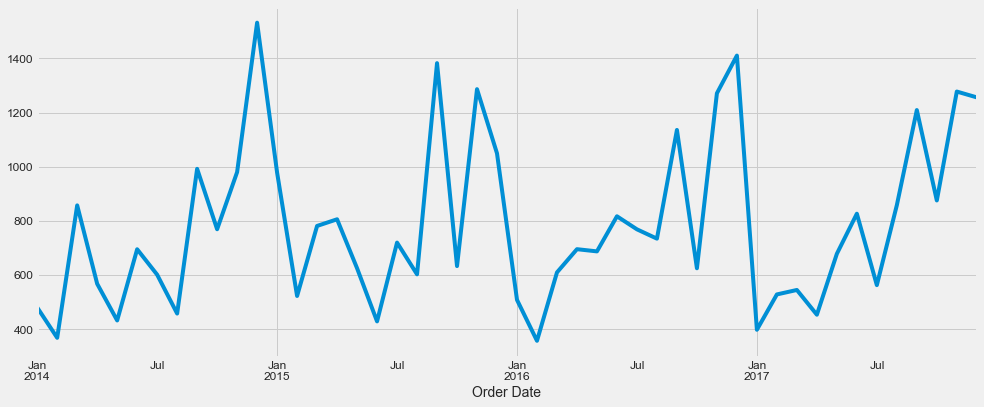

In [16]:
y.plot(figsize = (15,6))
plt.show()

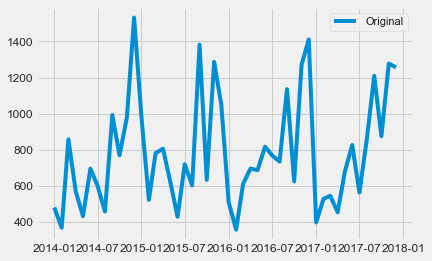

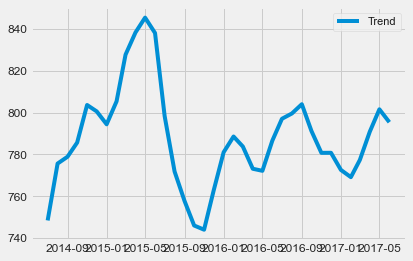

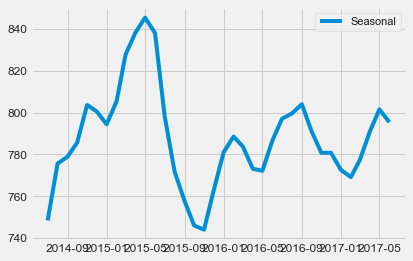

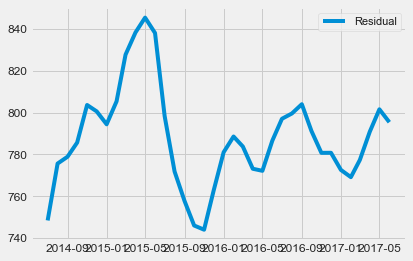

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(trend, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(trend, label = 'Residual')
plt.legend(loc = 'best')

Null Hypothesis : The series has a unit root (valus of a = 1) (not stationary) // 
Alternate Hypothesis : The series has no unit root (stationary)

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print('ADF statistics: %f' % result[0])
print('p-values: %f' % result[1])
print('Critical Values: ')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistics: -5.191070
p-values: 0.000009
Critical Values: 
	1%: -3.621
	5%: -2.944
	10%: -2.610


# Time Series Forcasting using ARIMA

In [20]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]
#The m parameter influences the p, d, and q parameters. For example, an m of 12 for monthly data
#suggests a yearly seasonal cycle.
print('Examples of parameter combination for Seasonal ARIMA......')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combination for Seasonal ARIMA......
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
#The SARIMA time series forecasting method is supported in Python via the Statsmodels library
#An instance of the SARIMAX class can be created by providing the training data and a host of model
#configuration parameters.
#The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name
#means that the implementation also supports exogenous variables.
#Exogenous variables are variables whose cause is external to the model and whose role is to explain
#other variables or outcomes in the model.
from pylab import rcParams #Param means Parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param,
seasonal_order = param_seasonal,
enforce_stationarity = False,
enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12- AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue
#enforce_stationarity - Whether or not to transform the AR parameters to enforce stationarity in the
#autoregressive component of the model. Default is True.
#enforce_invertibility - Whether or not to transform the MA parameters to enforce invertibility in the 
#moving average component of the model. Default is True.
#Invertibility refers to linear stationary process which behaves like infinite representation of
#autoregressive. In other word, this is the property that possessed by a moving average process.
#Invertibility solves non-uniqueness of autocorrelation function of moving average.
#The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative
#quality of statistical models for a given set of data. Given a collection of models for the data,
#AIC estimates the quality of each model, relative to each of the other models.

ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:1335.7513408560792
ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:477.7170130920111
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:302.27028997937765
ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:1418.3542582233354
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:304.24882803009683
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:720.9252270758142
ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:2671.7644751115704
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:466.5607429809128
ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:291.62613896732984
ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:499.5784376523323
ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:2493.774680157148
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:319.9884876946869
ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:291.8725576497959
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:1252.261696843413
ARIMA(0, 1, 0)x(0, 1, 0

In [22]:
mod =sm.tsa.statespace.SARIMAX(y,
                              order = (1, 1, 1), #0,1,1
                              seasonal_order = (1, 1, 1, 12), #0,1,1,12
                              enforce_stationarity = False,
                              enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

#The model summary above contains the ‘Covariance Type’ graph, which depicts each of the variables’
#impact on the forecast. We have four main lagged AR and MA variables. The first set of AR and MA
#variables is lagged by 1 time step (ar.L1 and ma.L1, respectively), and the second set is lagged by
#12 time steps (ar.S.L12 and ma.S.L12).

#Looking at the ‘P>abs(z)’ term in the graph, all variables read as 0. This is great, as we want our P
#values to be as close to 0 as possible. Using a cutoff of <0.05 for statistical significance, all of
#our lagged AR and MA terms significantly impact model forecast.

#The sigma2 output in the coefficients table is the estimate of the variance of the error term

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.814      -0.186
ar.S.L12      -0.0036      0.424     -0.008      0.993      -0.834       0.827
ma.S.L12      -0.3011      0.501     -0.601      0.548      -1.283       0.681
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts


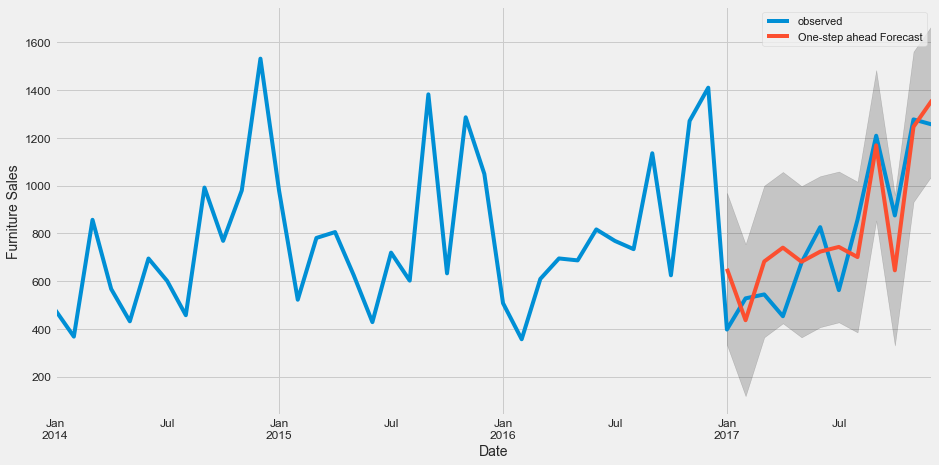

In [61]:
#set forecasts to start at 2017-01-01 to the end of the data to forecast
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()
#conf_int: Returns the confidence interval of the fitted parameters
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label = 'One-step ahead Forecast', alpha = 1, figsize = (14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()
#Matplotlib allows you to adjust the transparency of a graph plot using the alpha attribute. 
#By default, alpha=1. If you want to make the graph plot more transparent, then you can make alpha 
#less than 1, such as 0.5 or 0.25. If you want to make the graph plot less transparent, then you can 
#make alpha greater than 1.

In [62]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Sqaured Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 25708.54
The Root Mean Sqaured Error of our forecasts is 160.34


            lower Sales  upper Sales
2018-01-01   180.617015   809.061902
2018-02-01   186.312717   815.745037
2018-03-01   282.721286   912.318645
2018-04-01   231.729287   861.313580
2018-05-01   371.221500  1000.807441
2018-06-01   495.556539  1125.142855
2018-07-01   318.523388   948.110344
2018-08-01   505.351524  1134.939238
2018-09-01   900.317170  1529.905776
2018-10-01   503.963983  1133.553614
2018-11-01   970.179550  1599.770320
2018-12-01   983.031597  1612.624103
2019-01-01   113.358128   891.788921


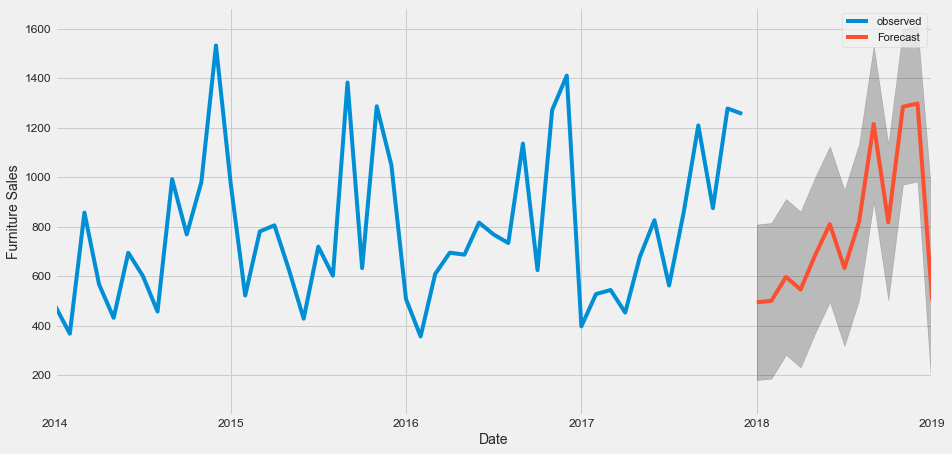

In [63]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax=ax, label = 'Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

In [66]:
results.plot_diagnostics(figsize = (14, 7))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1008x504 with 0 Axes>

In [ ]:
#https://techrando.com/2020/01/04/time-series-forecasting-using-a-seasonal-arima-model/
#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

# CONCLUSION

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time.
